In [ ]:
!pip install numpy==1.25.2

In [ ]:
!pip install scipy --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 37.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
      Successfully uninstalled scipy-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.
arviz 0.22.0 requires numpy>=1.26.0, but you have numpy 1.25.2 which is incompatible.


In [ ]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install joblib

In [ ]:
!pip install transformers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import spacy
from sentence_transformers import SentenceTransformer, util
from tqdm import tqdm

In [ ]:
dataset = pd.read_csv('UpdatedResumeDataSet.csv')

In [ ]:
dataset.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
dataset.columns

Index(['Category', 'Resume'], dtype='object')

In [ ]:
dataset.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
dataset[dataset["Category"].isnull()]

,Category,Resume


In [ ]:
dataset[dataset["Resume"].isnull()]

,Category,Resume


In [ ]:
dataset.isnull().any()

,0
Category,False
Resume,False


In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
dataset["Resume"].head(20)

,Resume
0,Skills * Programming Languages: Python (pandas...
1,Education Details \r\nMay 2013 to May 2017 B.E...
2,"Areas of Interest Deep Learning, Control Syste..."
3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,"Education Details \r\n MCA YMCAUST, Faridab..."
5,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Education Details \r\n B.Tech Rayat and Bahr...
8,Personal Skills â¢ Ability to quickly grasp t...
9,Expertise â Data and Quantitative Analysis â...


In [ ]:
def clean_text(text):
    # Basic cleanup
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9., ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
dataset["Cleaned resume"] = dataset["Resume"].apply(clean_text)

In [ ]:
dataset.head()

,Category,Resume,Cleaned resume
0,Data Science,Skills * Programming Languages: Python (pandas...,"skills programming languages python pandas, nu..."
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 to may 2017 b.e uit...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","areas of interest deep learning, control syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","education details mca ymcaust, faridabad, hary..."


In [ ]:
dataset.drop(labels = ["Resume"], axis=1, inplace = True)

In [ ]:
dataset.head(20)

,Category,Cleaned resume
0,Data Science,"skills programming languages python pandas, nu..."
1,Data Science,education details may 2013 to may 2017 b.e uit...
2,Data Science,"areas of interest deep learning, control syste..."
3,Data Science,skills r python sap hana tableau sap hana sql ...
4,Data Science,"education details mca ymcaust, faridabad, hary..."
5,Data Science,"skills c basics, iot, python, matlab, data sci..."
6,Data Science,skills python tableau data visualization r stu...
7,Data Science,education details b.tech rayat and bahra insti...
8,Data Science,personal skills ability to quickly grasp techn...
9,Data Science,expertise data and quantitative analysis decis...


In [ ]:
dataset.to_csv('cleaned_resumes.csv', index=False)

In [ ]:
jobs_dict = {
    "job_titles":["Data Scientist", "Machine Learning Engineer", "Data Analyst", "Backend Developer", "AI Research Intern", "Cloud DevOps Engineer", "Frontend React Developer", "Software Engineer (Full Stack)", "Product Data Scientist", "AI Prompt Engineer"],
    "job_descriptions":["We're seeking a Data Scientist proficient in Python, machine learning, and statistical modeling. Responsibilities include building predictive models, analyzing large datasets, and presenting insights. Experience with Pandas, Scikit-learn, and SQL required. 2+ years of experience preferred.",
                        "Looking for an ML Engineer with deep knowledge of TensorFlow or PyTorch. You'll build, optimize, and deploy ML models in production. Required: Python, APIs, cloud platforms (AWS or GCP). Strong software engineering fundamentals are a plus.",
                        "Join our team as a Data Analyst to transform raw data into actionable insights. Skills in Excel, SQL, Tableau, and Python are important. Understanding of business metrics and good communication is key.",
                        "Hiring a backend developer experienced in Node.js, REST APIs, and PostgreSQL. You'll design robust APIs and integrate with microservices. Knowledge of Docker and CI/CD pipelines is a bonus.",
                        "Assist in NLP and computer vision research. Looking for students or recent grads with experience in PyTorch, Hugging Face, and academic writing. Strong math/ML foundations are essential.",
                        "Manage and automate cloud infrastructure using AWS, Terraform, and Jenkins. Must be proficient in shell scripting and monitoring tools like Prometheus or Grafana.",
                        "React developer needed to build interactive web apps. Must know JavaScript, React, Redux, and responsive design. Familiarity with Figma or design tools is a plus.",
                        "Build and maintain full-stack applications using Python (Django or Flask) and React. Database knowledge (PostgreSQL/MySQL) and Git workflows required.",
                        "Work cross-functionally to analyze user behavior and experiment with product features. Tools: SQL, Python, A/B testing platforms. Experience with product analytics (Mixpanel, Amplitude) is beneficial.",
                        "Design and test prompts for large language models like GPT-4. Should understand NLP tasks, LLM APIs, and prompt engineering best practices. Creative writing or UX experience is a bonus."]
}

In [ ]:
dataset_jobs = pd.DataFrame(jobs_dict)

In [ ]:
dataset_jobs.head()

,job_titles,job_descriptions
0,Data Scientist,We're seeking a Data Scientist proficient in P...
1,Machine Learning Engineer,Looking for an ML Engineer with deep knowledge...
2,Data Analyst,Join our team as a Data Analyst to transform r...
3,Backend Developer,Hiring a backend developer experienced in Node...
4,AI Research Intern,Assist in NLP and computer vision research. Lo...


In [ ]:
dataset_jobs.to_csv('jobs.csv', index=False)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    object
 1   Cleaned resume  962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
dataset_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_titles        10 non-null     object
 1   job_descriptions  10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes


In [ ]:
resumes = dataset["Cleaned resume"].tolist()
texts = dataset_jobs["job_descriptions"].tolist()

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
pairs = []

for i, resume in tqdm(enumerate(resumes)):
    for j, text in enumerate(texts):
        resume_emb = model.encode(resume, convert_to_tensor=True)
        text_emb = model.encode(text, convert_to_tensor=True)
        similarity = util.cos_sim(resume_emb, text_emb).item()
        match_score = round(similarity * 100, 2)  # Scale to 0–100%
        pairs.append((resume, text, match_score))

0it [00:00, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
962it [02:31,  6.34it/s]


In [ ]:
dataset_similarity  = pd.DataFrame(pairs, columns=["Resume", "Job", "Match Score"])
dataset_similarity.to_csv('similarity_scores.csv', index=False)

In [ ]:
dataset_similarity.head(20)

,Resume,Job,Match Score
0,"skills programming languages python pandas, nu...",We're seeking a Data Scientist proficient in P...,49.00
1,"skills programming languages python pandas, nu...",Looking for an ML Engineer with deep knowledge...,42.19
2,"skills programming languages python pandas, nu...",Join our team as a Data Analyst to transform r...,50.45
3,"skills programming languages python pandas, nu...",Hiring a backend developer experienced in Node...,38.51
4,"skills programming languages python pandas, nu...",Assist in NLP and computer vision research. Lo...,40.20
5,"skills programming languages python pandas, nu...",Manage and automate cloud infrastructure using...,32.11
6,"skills programming languages python pandas, nu...",React developer needed to build interactive we...,34.19
7,"skills programming languages python pandas, nu...",Build and maintain full-stack applications usi...,30.78
8,"skills programming languages python pandas, nu...",Work cross-functionally to analyze user behavi...,43.40
9,"skills programming languages python pandas, nu...",Design and test prompts for large language mod...,43.09


#ML model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [ ]:
new_df = pd.read_csv('similarity_scores.csv')

In [ ]:
new_df.head()

,Resume,Job,Match Score
0,"skills programming languages python pandas, nu...",We're seeking a Data Scientist proficient in P...,49.00
1,"skills programming languages python pandas, nu...",Looking for an ML Engineer with deep knowledge...,42.19
2,"skills programming languages python pandas, nu...",Join our team as a Data Analyst to transform r...,50.45
3,"skills programming languages python pandas, nu...",Hiring a backend developer experienced in Node...,38.51
4,"skills programming languages python pandas, nu...",Assist in NLP and computer vision research. Lo...,40.20


In [ ]:
resume_embeddings = model.encode(new_df['Resume'].tolist(), batch_size=16, convert_to_numpy=True)
job_embeddings = model.encode(new_df['Job'].tolist(), batch_size=16, convert_to_numpy=True)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [ ]:
resume_embeddings.shape

(9620, 384)

In [ ]:
job_embeddings.shape

(9620, 384)

In [ ]:
print(resume_embeddings)

[[-0.07655612 -0.02373087 -0.03279623 ... -0.04450021  0.03675761
   0.01381731]
 [-0.07655612 -0.02373087 -0.03279623 ... -0.04450021  0.03675761
   0.01381731]
 [-0.07655612 -0.02373087 -0.03279623 ... -0.04450021  0.03675761
   0.01381731]
 ...
 [-0.01717417 -0.01162983 -0.00501951 ... -0.00427034 -0.06919537
   0.00670543]
 [-0.01717417 -0.01162983 -0.00501951 ... -0.00427034 -0.06919537
   0.00670543]
 [-0.01717417 -0.01162983 -0.00501951 ... -0.00427034 -0.06919537
   0.00670543]]


In [ ]:
print(job_embeddings)

[[-0.00916273 -0.09864451  0.04929122 ...  0.02173063  0.00632521
   0.03888318]
 [-0.02959547 -0.12751582  0.06483397 ...  0.00645557  0.01906632
  -0.00133297]
 [ 0.00433477 -0.00912314 -0.05892873 ...  0.0235768  -0.04082292
  -0.02430109]
 ...
 [-0.03240487 -0.10107478  0.01584978 ... -0.014042    0.04264887
   0.01220952]
 [-0.02130159 -0.09534103 -0.03229286 ...  0.0029571   0.06009787
   0.02821148]
 [-0.00990508 -0.01805156  0.06168868 ...  0.11967806 -0.00756965
   0.03481505]]


In [ ]:
X = np.hstack((resume_embeddings, job_embeddings))
y = new_df['Match Score'].values

In [ ]:
X.shape

(9620, 768)

In [ ]:
y.shape

(9620,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("MSE: ", mse)

MSE:  21.040933774265177


In [ ]:
print("R-score: ", r2)

R-score:  0.8130327339670994


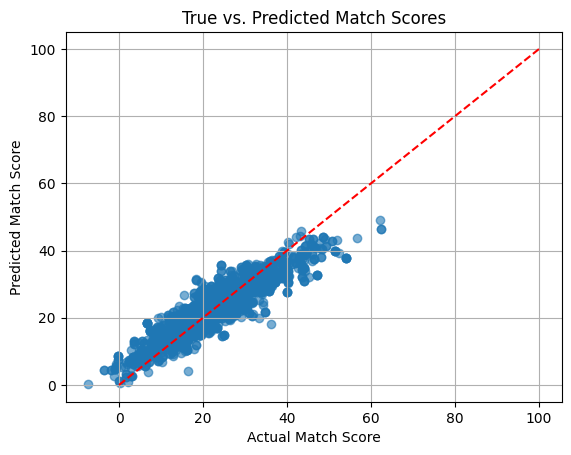

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Match Score")
plt.ylabel("Predicted Match Score")
plt.title("True vs. Predicted Match Scores")
plt.plot([0, 100], [0, 100], 'r--')
plt.grid(True)
plt.show()

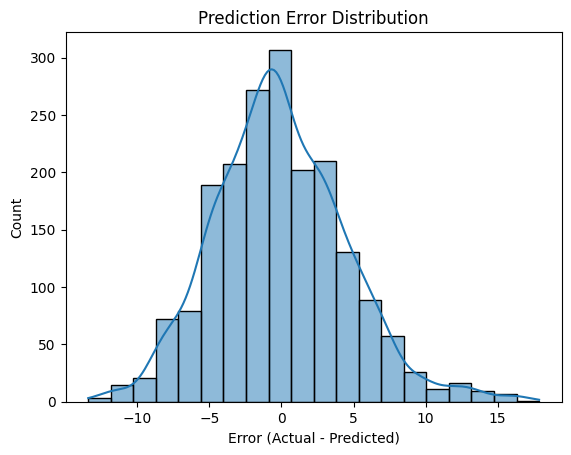

In [ ]:
errors = y_test - y_pred
sns.histplot(errors, bins=20, kde=True)
plt.title("Prediction Error Distribution")
plt.xlabel("Error (Actual - Predicted)")
plt.show()

In [ ]:
for i in range(5):
    print(f"Resume: {new_df.iloc[i]['Resume'][:200]}...")
    print(f"Job: {new_df.iloc[i]['Job'][:200]}...")
    print(f"Actual Score: {y_test[i]:.2f} — Predicted Score: {y_pred[i]:.2f}")
    print("-" * 60)

Resume: skills programming languages python pandas, numpy, scipy, scikitlearn, matplotlib, sql, java, javascriptjquery. machine learning regression, svm, nave bayes, knn, random forest, decision trees, boosti...
Job: We're seeking a Data Scientist proficient in Python, machine learning, and statistical modeling. Responsibilities include building predictive models, analyzing large datasets, and presenting insights....
Actual Score: 27.61 — Predicted Score: 30.47
------------------------------------------------------------
Resume: skills programming languages python pandas, numpy, scipy, scikitlearn, matplotlib, sql, java, javascriptjquery. machine learning regression, svm, nave bayes, knn, random forest, decision trees, boosti...
Job: Looking for an ML Engineer with deep knowledge of TensorFlow or PyTorch. You'll build, optimize, and deploy ML models in production. Required: Python, APIs, cloud platforms (AWS or GCP). Strong softwa...
Actual Score: 33.51 — Predicted Score: 35.84
-------

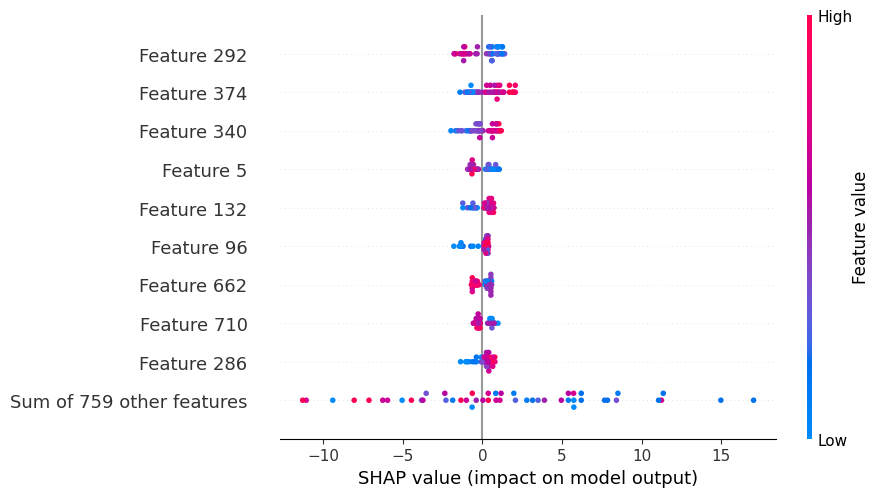

In [ ]:
import shap
explainer = shap.Explainer(regressor, X_train)
shap_values = explainer(X_test[:50])  # use a subset for speed

# Plot feature importance
shap.plots.beeswarm(shap_values)

In [ ]:
import joblib
import os

# Create the 'models' directory if it doesn't exist
os.makedirs('models', exist_ok=True)

joblib.dump(regressor, 'models/resume_matcher.pkl')

['models/resume_matcher.pkl']